# getting the data

We will fetch the data from the habitat api and store it in a file.
The reason we are not directly importing the json int our data structure is to have reproduceable steps and data when training and especially evaluating our model.

In [ ]:
## fetching the data from the api

In [18]:
import urllib.request, json
with urllib.request.urlopen("https://habitat-lifesupport.herokuapp.com/measurements?token=Gafdiweq931") as url:
    data = json.loads(url.read())

In [ ]:
## saving to file

In [17]:
with open("measurements.json", "w") as file:
    json.dump(data, file)

In [ ]:
## loading data from file into a panda dataframe

In [13]:
import pandas as pd
with open("measurements.json") as file:
    data = pd.read_json(file)
    print(str(data))

      humidity                   measuredAt  temperature
0         56.2   2018-01-02T17:00:03.69314Z         18.3
1         56.5  2018-01-02T16:00:13.978895Z         18.7
2         56.5  2018-01-02T15:00:13.473612Z         18.7
3         56.2  2018-01-02T14:00:11.021869Z         18.6
4         57.1  2018-01-02T13:00:06.941931Z         19.0
5         56.3  2018-01-02T12:00:11.938083Z         18.5
6         57.7  2018-01-02T11:00:09.692707Z         19.1
7         57.4  2018-01-02T10:00:09.613086Z         18.5
8         56.1  2018-01-02T09:00:07.608195Z         18.5
9         57.5  2018-01-02T08:00:11.331374Z         18.8
10        57.5  2018-01-02T07:00:10.808731Z         18.1
11        57.7  2018-01-02T06:00:07.600031Z         18.9
12        58.0  2018-01-02T05:00:07.494203Z         18.8
13        57.4  2018-01-02T04:00:09.445793Z         18.7
14        56.3  2018-01-02T03:00:10.469529Z         18.2
15        57.3  2018-01-02T02:00:09.485273Z         18.6
16        57.5   2018-01-02T01:

In [14]:
data['humidity'].describe()

count    4962.000000
mean       61.290548
std         6.600630
min        29.500000
25%        57.200000
50%        62.000000
75%        66.100000
max        79.900000
Name: humidity, dtype: float64

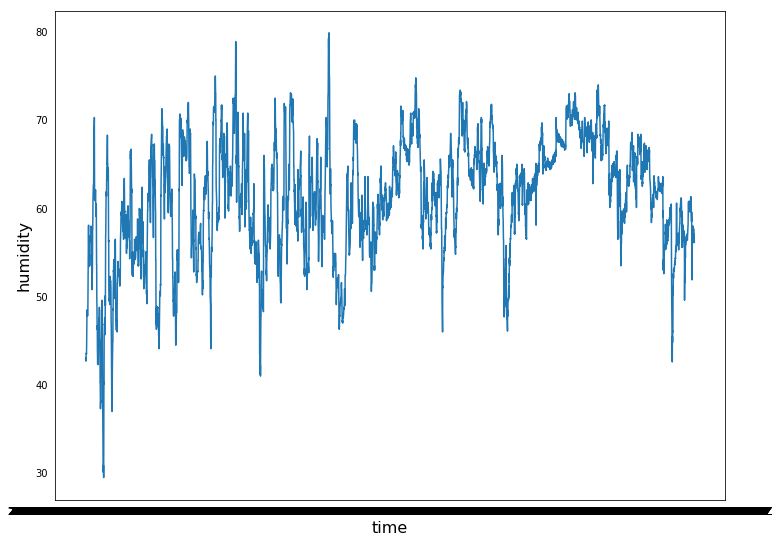

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,9))
plt.xlabel("time", fontsize=16)
plt.ylabel("humidity", fontsize=16)
x = data['measuredAt']
y = data['humidity']


plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")    
  
plt.plot(x, y)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e1c4f98>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10bb2e668>]], dtype=object)

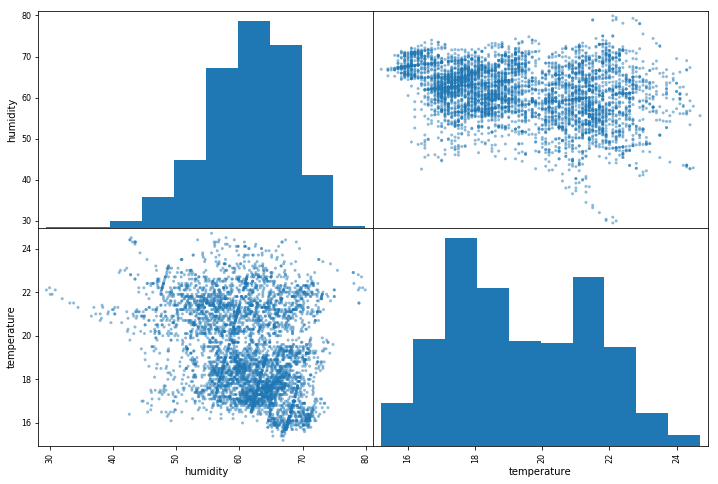

In [20]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(12, 8))